## Attribute Information

- **Age**: age of the patient [years]
- **Sex**: sex of the patient [M: Male, F: Female]
- **ChestPainType**: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- **RestingBP**: resting blood pressure [mm Hg]
- **Cholesterol**: serum cholesterol [mm/dl]
- **FastingBS**: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- **RestingECG**: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST - elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- **MaxHR**: maximum heart rate achieved [Numeric value between 60 and 202]
- **ExerciseAngina**: exercise-induced angina [Y: Yes, N: No]
- **Oldpeak**: oldpeak = ST [Numeric value measured in depression]
- **ST_Slope**: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- **HeartDisease**: output class [1: heart disease, 0: Normal]



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn import tree

In [2]:
df = pd.read_csv('./dataset/heart.csv')

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## EDA

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
print(f"This dataset has {df.shape[0]} rows and {df.shape[1]} features")

This dataset has 918 rows and 12 features


### Statistical information of the dataset 

In [7]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [8]:
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [9]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### Graphs

### Pair plot

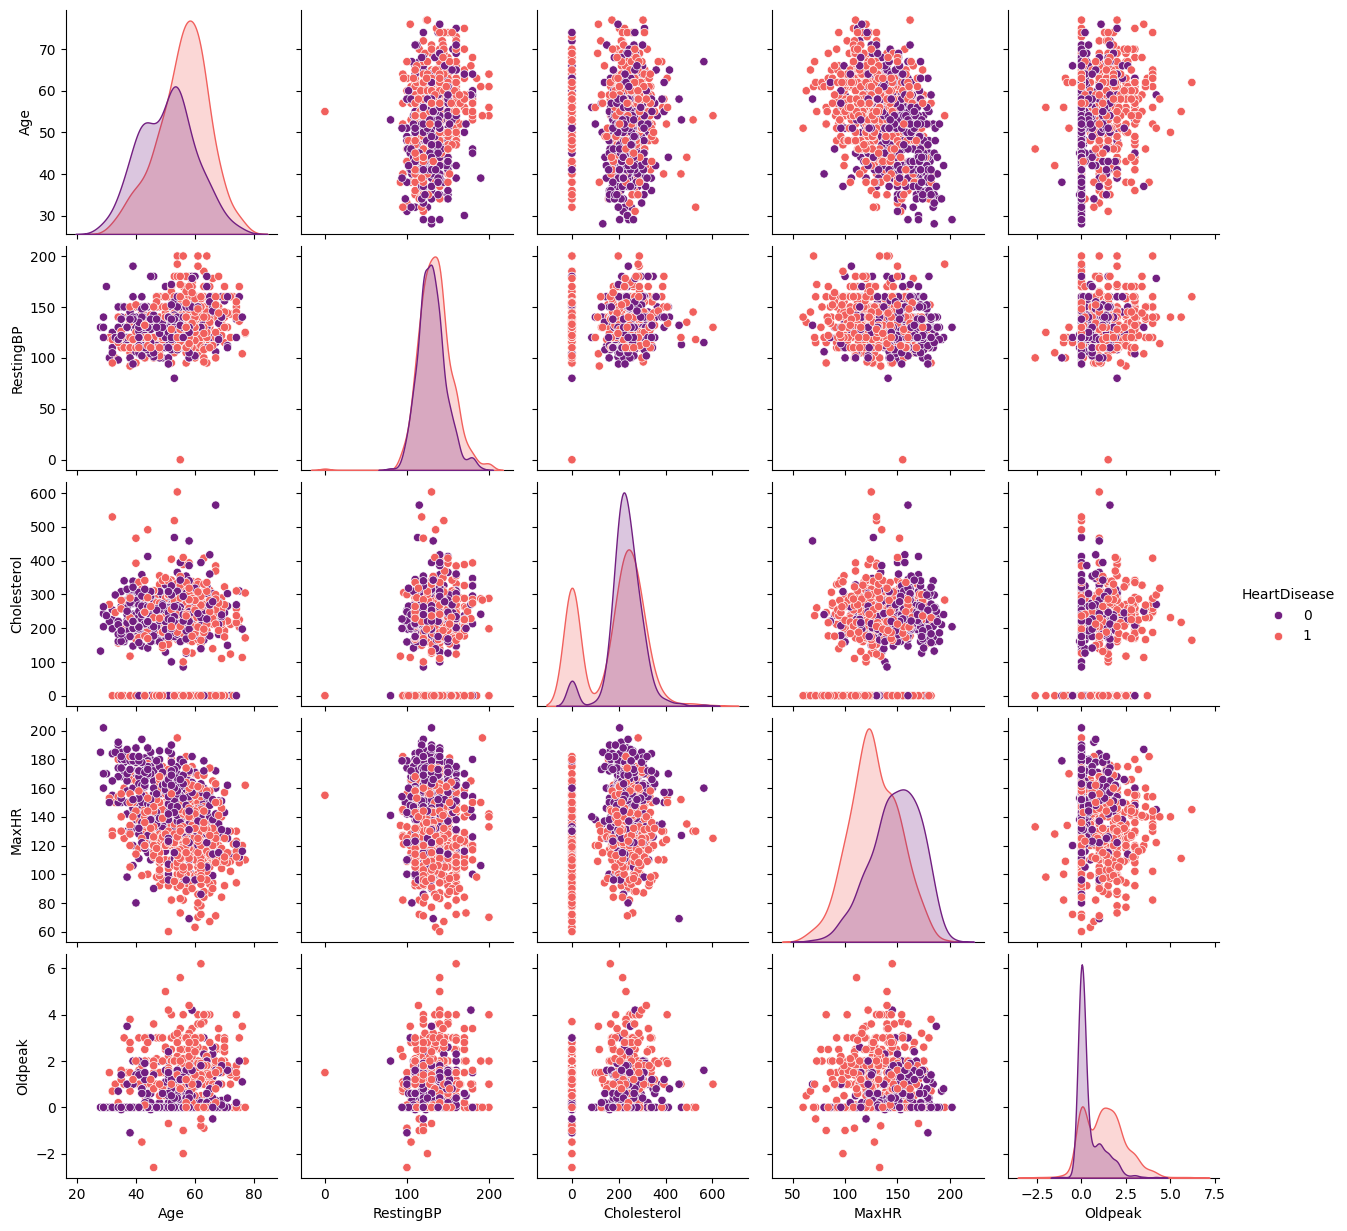

In [10]:
sns.pairplot(df.drop(columns=categorical_columns+['FastingBS'], axis=1), hue='HeartDisease', palette='magma')
plt.show()

In [11]:
print("Quantity of class 0:", len(df[df['HeartDisease'] == 0]))
print("Quantity of class 1:", len(df[df['HeartDisease'] == 1]))

Quantity of class 0: 410
Quantity of class 1: 508


### count plot

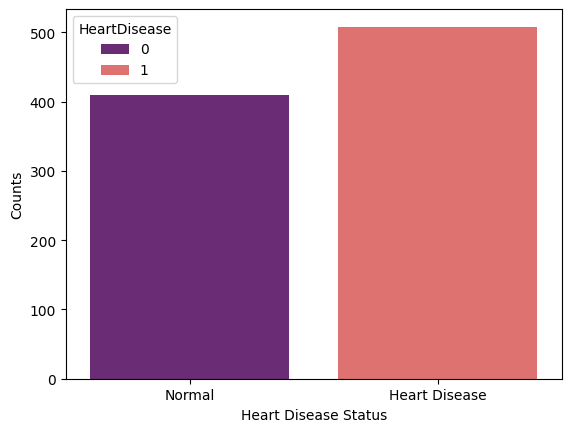

In [12]:
sns.countplot(df, x="HeartDisease", hue='HeartDisease', palette='magma')

plt.xticks(ticks=[0, 1], labels=["Normal", "Heart Disease"])
plt.xlabel("Heart Disease Status")
plt.ylabel("Counts")

plt.show()

### count plot (categorical features)

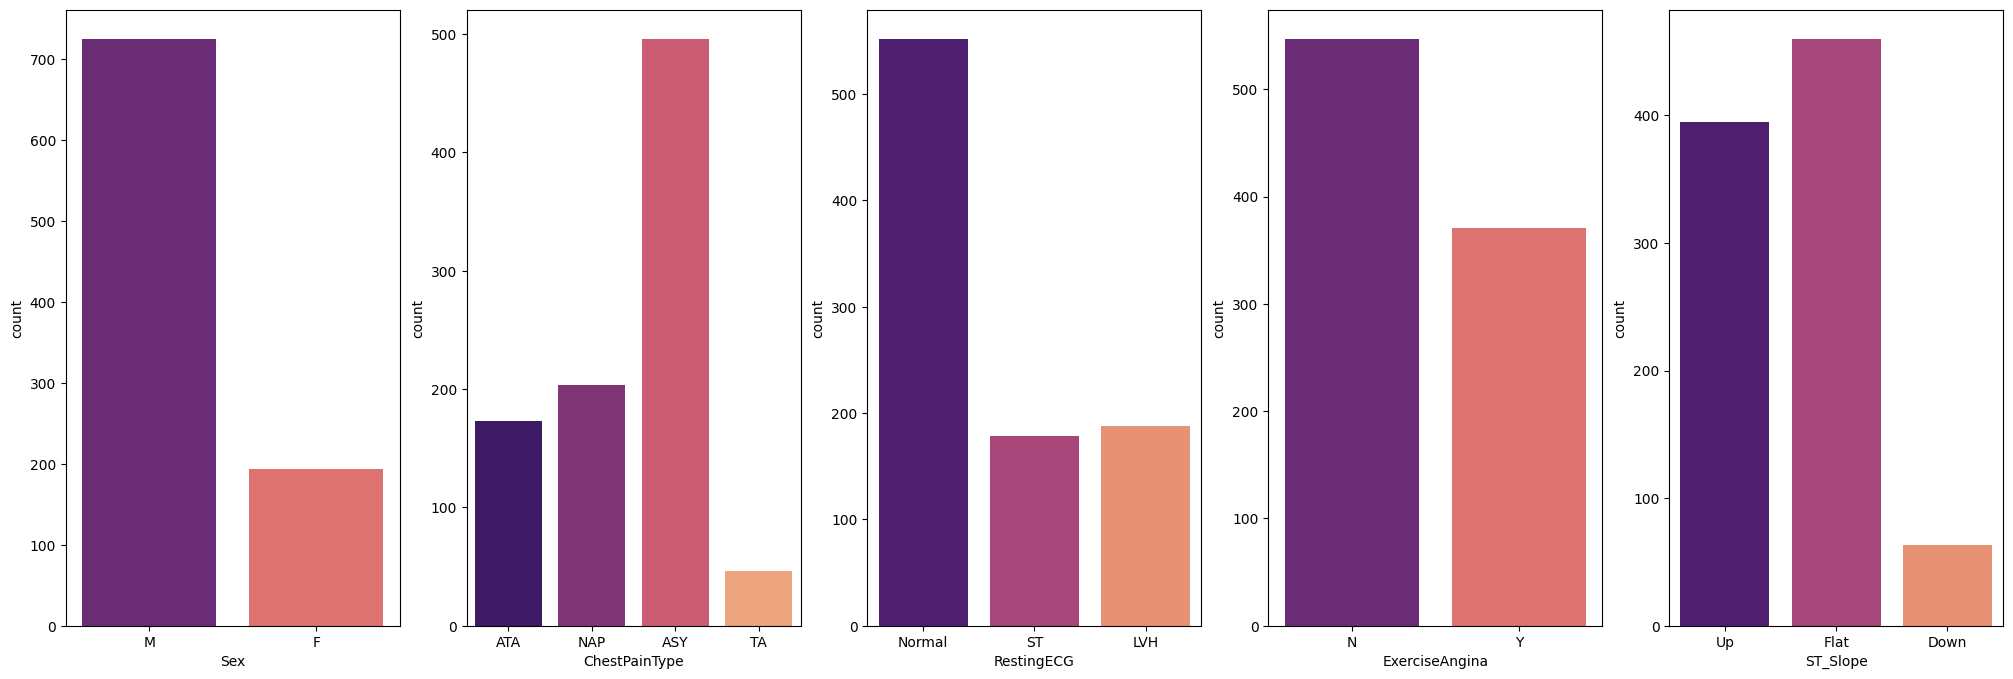

In [13]:
import matplotlib as mpl
fig, axes = plt.subplots(1, len(categorical_columns), figsize=(25, 8))

for i, column in enumerate(categorical_columns):
    feature, count = df[column].value_counts().index, df[column].value_counts().values
    sns.countplot(x=df[column], palette='magma', ax=axes[i], hue=df[column])

plt.show()

### correlation matrix

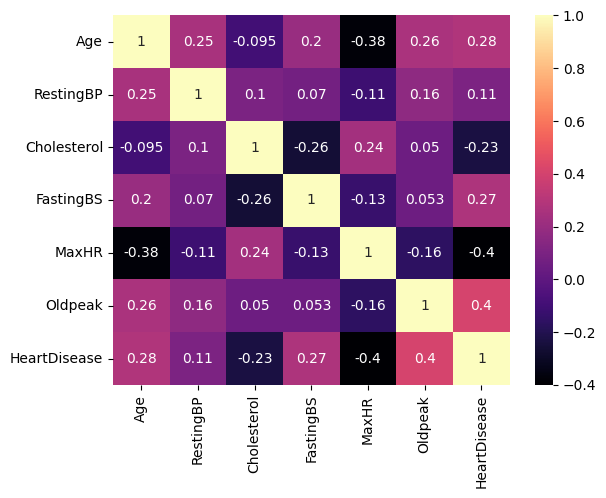

In [14]:
corr_matrix = df.drop(categorical_columns, axis=1).corr()


sns.heatmap(corr_matrix, annot=True, cmap="magma")
plt.show()

## Data Encoding
 - Encoding categorical features with <b>onehot encoder<b>

In [15]:
x = df.iloc[:, :-1]
y = df['HeartDisease']

In [16]:
x_train, x_test, y_train,  y_test = train_test_split(x, y, test_size=0.15, random_state=10)

In [17]:
x_train = x_train.reset_index().drop(['index'], axis=1)
x_test = x_test.reset_index().drop(['index'], axis=1)
y_train = y_train.reset_index().drop(['index'], axis=1).values.ravel()
y_test = y_test.reset_index().drop(['index'], axis=1).values.ravel()

In [18]:
x_train.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,61,M,TA,134,234,0,Normal,145,N,2.6,Flat
1,46,F,ASY,138,243,0,LVH,152,Y,0.0,Flat
2,65,M,ASY,145,0,1,ST,67,N,0.7,Flat
3,43,M,ASY,110,211,0,Normal,161,N,0.0,Up
4,56,M,NAP,130,167,0,Normal,114,N,0.0,Up


In [19]:
oneHot = OneHotEncoder(sparse_output=False)

def fit_encoder(df, columns):
    oneHot.fit(df[columns])
    
    return oneHot

def transform(df, columns, encoder):
    encoded_features = encoder.transform(df[columns])
    encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out()).astype('int')
    
    new_df = pd.concat([df, encoded_df], axis=1)
    new_df = new_df.drop(columns, axis=1)
    
    
    return new_df

In [20]:
encoder = fit_encoder(x_train, categorical_columns)

x_train_encoded = transform(x_train, categorical_columns, encoder)

In [21]:
x_train_encoded.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,61,134,234,0,145,2.6,0,1,0,0,0,1,0,1,0,1,0,0,1,0
1,46,138,243,0,152,0.0,1,0,1,0,0,0,1,0,0,0,1,0,1,0
2,65,145,0,1,67,0.7,0,1,1,0,0,0,0,0,1,1,0,0,1,0
3,43,110,211,0,161,0.0,0,1,1,0,0,0,0,1,0,1,0,0,0,1
4,56,130,167,0,114,0.0,0,1,0,0,1,0,0,1,0,1,0,0,0,1


In [22]:
x_train_encoded.dtypes

Age                    int64
RestingBP              int64
Cholesterol            int64
FastingBS              int64
MaxHR                  int64
Oldpeak              float64
Sex_F                  int64
Sex_M                  int64
ChestPainType_ASY      int64
ChestPainType_ATA      int64
ChestPainType_NAP      int64
ChestPainType_TA       int64
RestingECG_LVH         int64
RestingECG_Normal      int64
RestingECG_ST          int64
ExerciseAngina_N       int64
ExerciseAngina_Y       int64
ST_Slope_Down          int64
ST_Slope_Flat          int64
ST_Slope_Up            int64
dtype: object

## Model Training

In [23]:
rf = RandomForestClassifier(
                            n_estimators=200,
                            max_features='sqrt', 
                            max_depth=4,
                            random_state=12345,
                            oob_score=True
)

## Metrics

### Cross-Validation

In [24]:
cross_val_scores = cross_val_score(rf, x_train_encoded, y_train, cv=5)

print("cross validation scores:", cross_val_scores)
print("Mean validation score:", f'{cross_val_scores.mean(): .2f}')

cross validation scores: [0.88461538 0.86538462 0.90384615 0.89102564 0.8525641 ]
Mean validation score:  0.88


In [25]:
rf.fit(x_train_encoded, y_train)

RandomForestClassifier(max_depth=4, n_estimators=200, oob_score=True,
                       random_state=12345)

In [26]:
x_test_encoded = transform(x_test, categorical_columns, encoder)

prediction = rf.predict(x_test_encoded)

In [27]:
def evaluate(x_train, y_train, x_test, true_label, prediction):
    
    print("mean accuracy on training dataset:", f'{rf.score(x_train, y_train): .2f}')
    print("mean accuracy on testing dataset: ", f'{rf.score(x_test, y_test): .2f}')
    print("O.O.B:                            ", f'{rf.oob_score_: .2f}')
    print('\n')
    
    print(classification_report(prediction, true_label))


In [28]:
evaluate(x_train_encoded, y_train, x_test_encoded, y_test, prediction)

mean accuracy on training dataset:  0.89
mean accuracy on testing dataset:   0.84
O.O.B:                              0.88


              precision    recall  f1-score   support

           0       0.80      0.83      0.82        59
           1       0.87      0.85      0.86        79

    accuracy                           0.84       138
   macro avg       0.84      0.84      0.84       138
weighted avg       0.84      0.84      0.84       138



### Confusion Matrix

In [29]:
prediction = rf.predict(x_test_encoded)
cm = confusion_matrix(y_test, prediction, labels=rf.classes_)

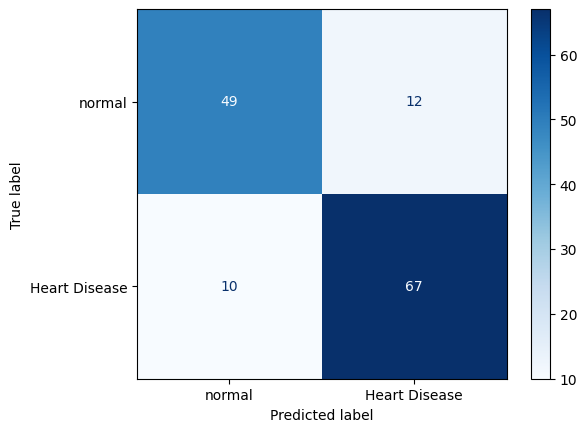

In [30]:
disp = ConfusionMatrixDisplay(cm, display_labels=['normal', 'Heart Disease'])
disp.plot(cmap='Blues')
plt.show()

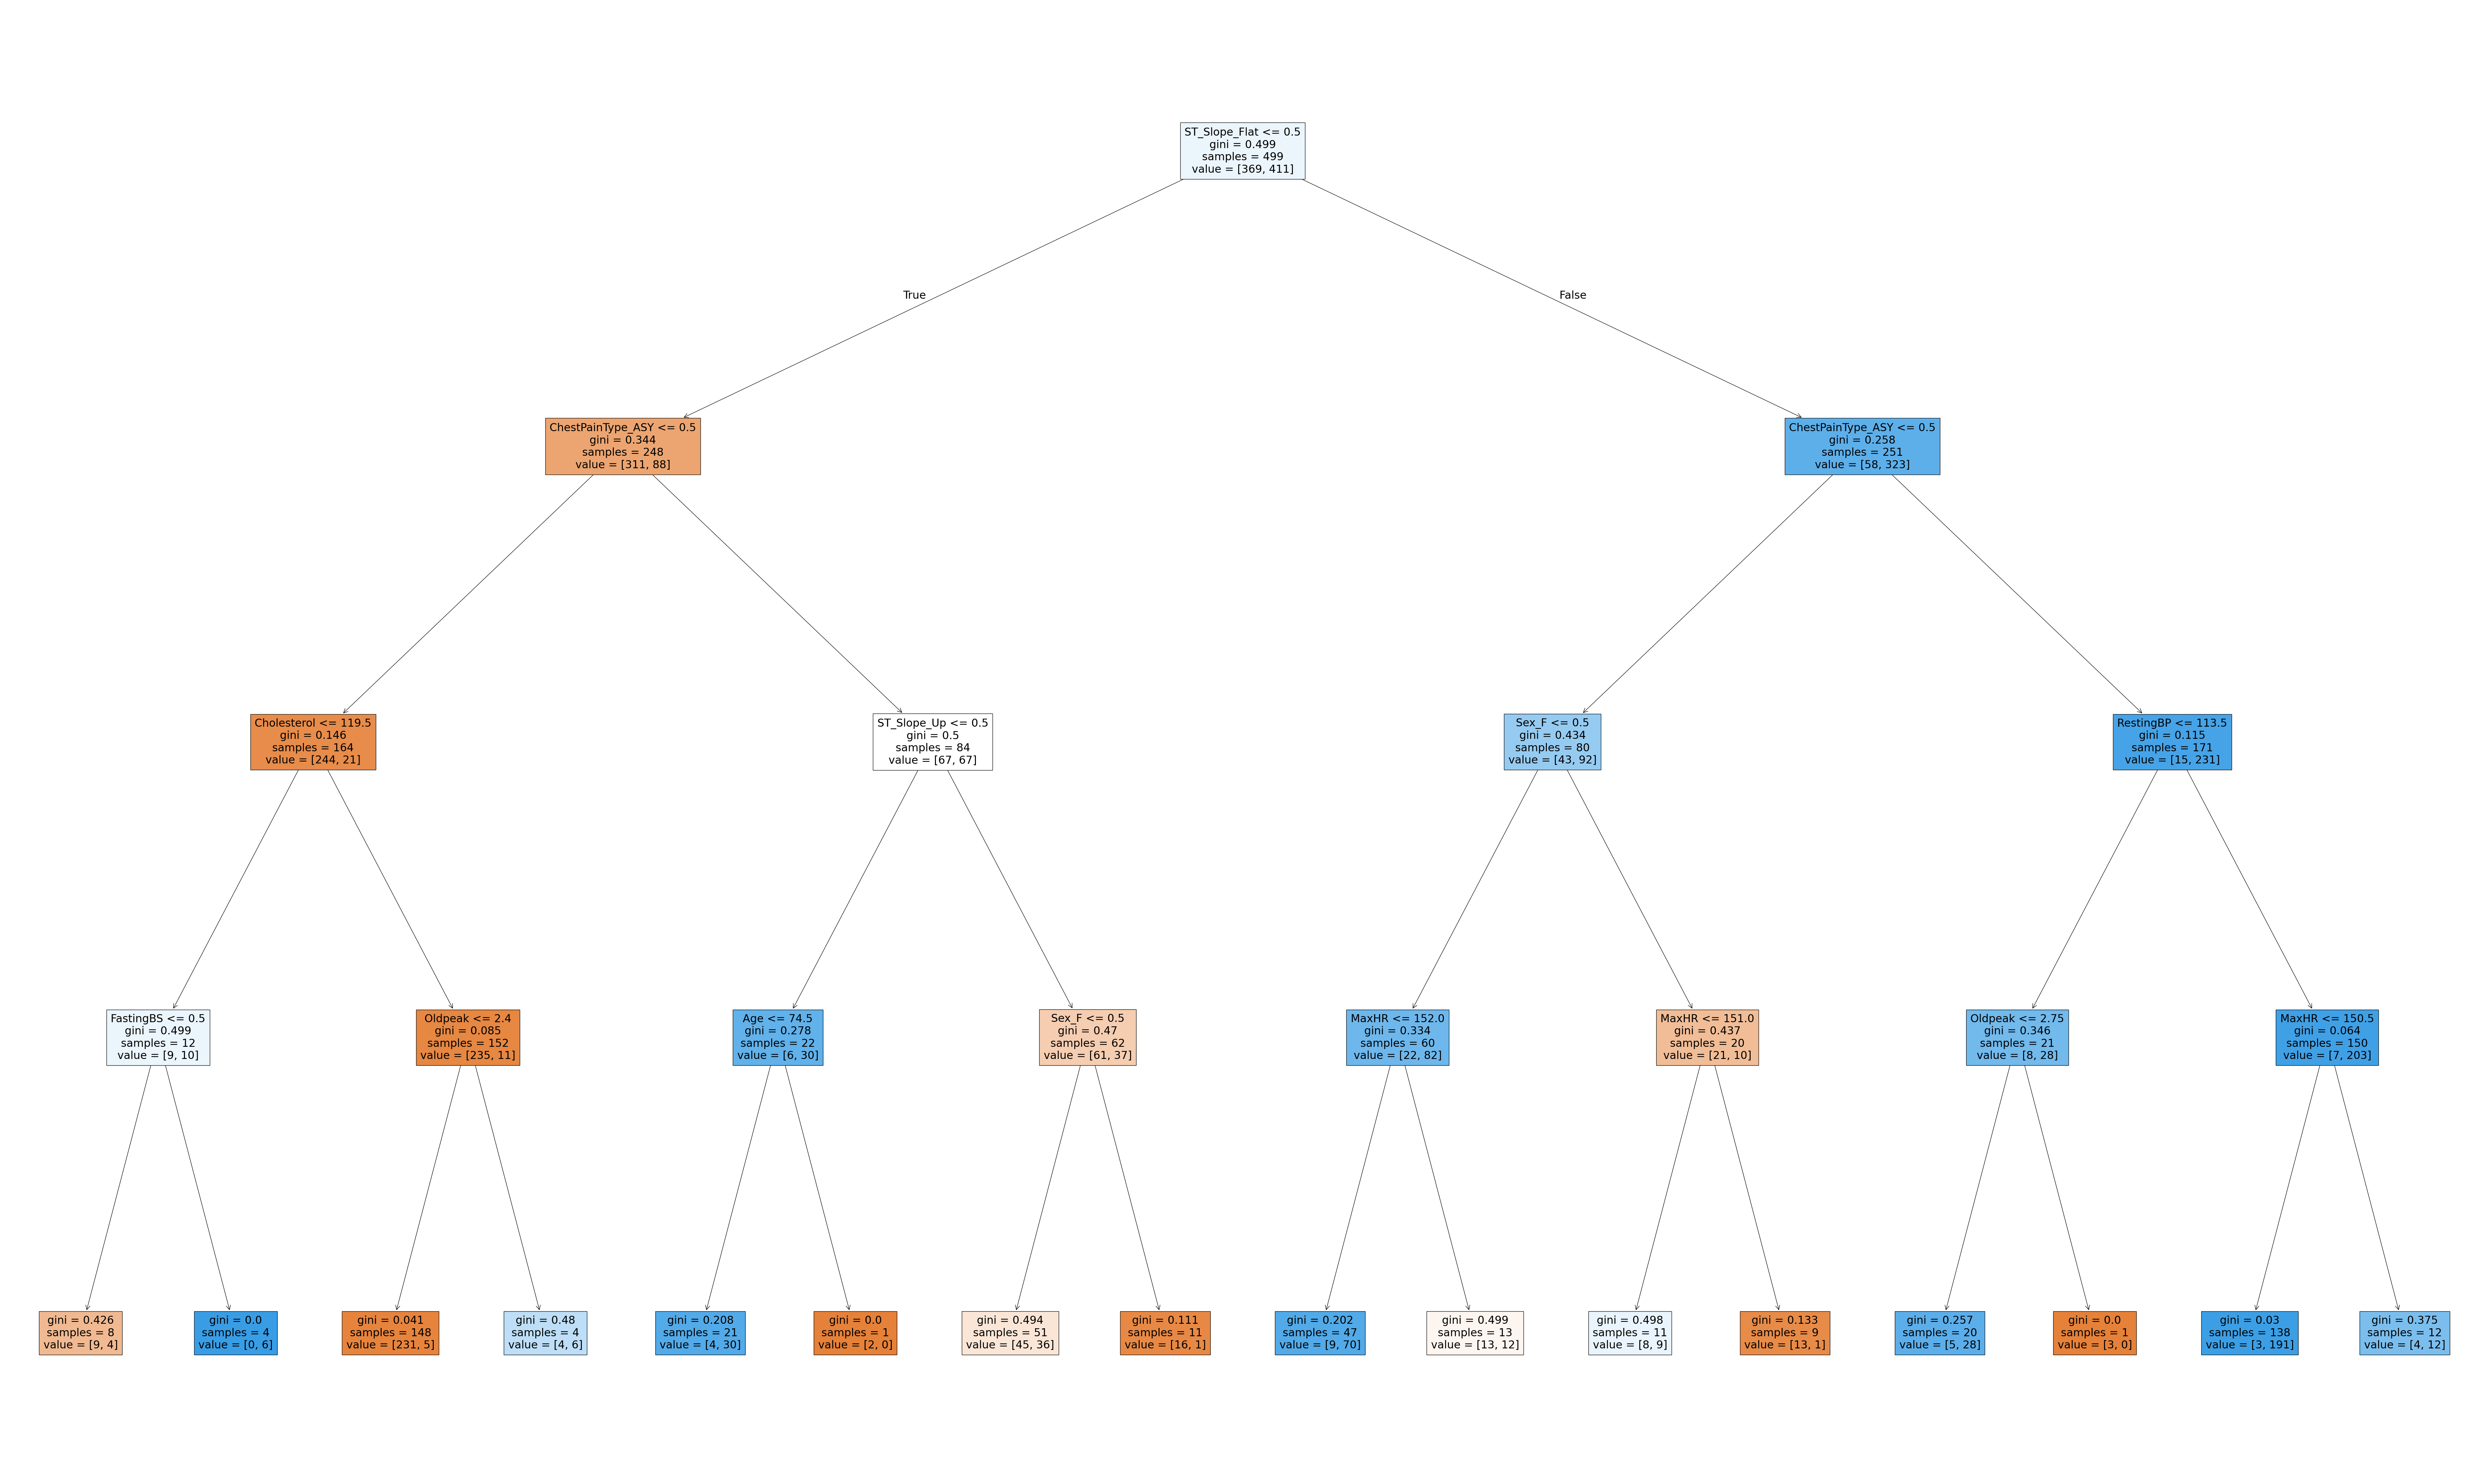

In [31]:
plt.figure(figsize=(100, 60))
tree.plot_tree(rf.estimators_[4],
              feature_names=x_train_encoded.columns,
              filled=True
              )

plt.show()

C:\Users\curse\anaconda3\envs\datasci\Lib\site-packages\sklearn\ensemble\_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\curse\anaconda3\envs\datasci\Lib\site-packages\sklearn\ensemble\_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\curse\anaconda3\envs\datasci\Lib\site-packages\sklearn\ensemble\_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


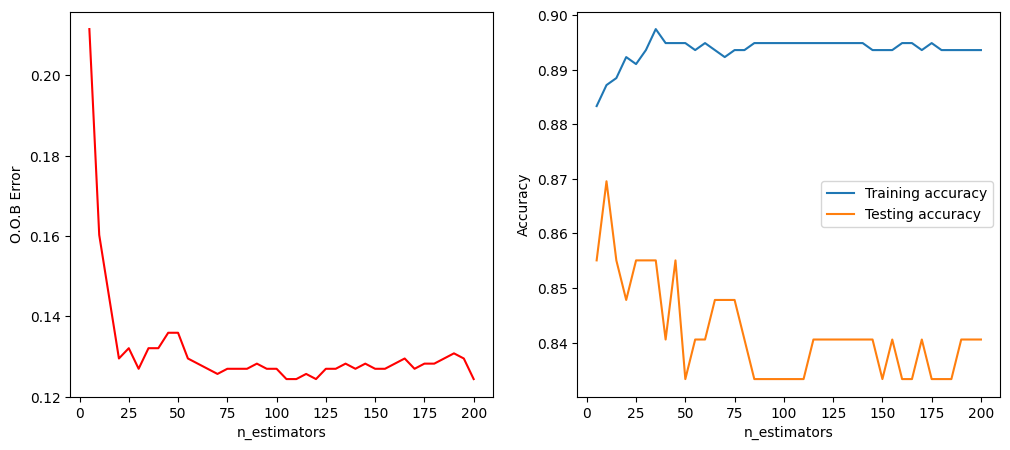

In [32]:
min_estimator = 5
max_estimator = 200

n_estimators = []
OOB_error_rate = []

training_accuracy = []
testing_accuracy = []

for i in range(min_estimator, max_estimator+1, 5):
    rf.set_params(n_estimators=i)
    rf.fit(x_train_encoded, y_train)
        
    n_estimators.append(i)
    OOB_error_rate.append(1-rf.oob_score_)
    
    
    training_accuracy.append(rf.score(x_train_encoded, y_train))
    testing_accuracy.append(rf.score(x_test_encoded, y_test))
    


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(n_estimators, OOB_error_rate, 'r')
ax1.set(xlabel='n_estimators', ylabel='O.O.B Error')

ax2.plot(n_estimators, training_accuracy, label='Training accuracy')
ax2.plot(n_estimators, testing_accuracy, label='Testing accuracy')
ax2.set(xlabel='n_estimators', ylabel='Accuracy')

ax2.legend()
plt.show()